Name

Labpartner(s)

In [160]:
#import statements go here
import pandas as pd
from scipy import stats
import numpy as np

# Class 12.2

# Warmups 11.2

**W.1.** In the scipy lecture notes on statistics go through **Section 3.1.2 Hypothesis testing: comparing two groups** tutorial. Make sure to read up about t-tests and the rest if you are not familiar with these statistical methods.
https://scipy-lectures.org/packages/statistics/index.html#id13

Note you will need to load in the dataset on brains at the beginning of the section

It is suggested you do the rest of the 3.1 section for practice this week. Most of it is review, some of it is new and useful for you all.

In [38]:
warmup = pd.read_csv('brain_size.csv', sep=';', na_values='.')

In [39]:
warmup

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


In [34]:
female_viq = warmup[warmup['Gender'] == 'Female']['VIQ']
male_viq = warmup[warmup['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)   

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

In [40]:
female_w = warmup[warmup['Gender'] == 'Female']['Weight']
male_w = warmup[warmup['Gender'] == 'Male']['Weight']
stats.mannwhitneyu(female_w, male_w)   

MannwhitneyuResult(statistic=54.0, pvalue=4.127116935096376e-05)

# Lecture 12.2

### Agenda:


Some useful things to do with a timeseries
- datetime objects
- moving averages
- detrending

#### Datetime Objects in python and pandas

Python has a wonderful feature called datetime objects. These are super-useful if you are dealing with any data that has a timestamp. They are a bit tricky to get used to, but worth the effort, and the alternatives are usually much more painful (trust me on this one). 

Documentation: 
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
- https://docs.python.org/3/library/datetime.html

There is a lot you can do with these. Here we will just cover the basics. Dig in to the documentation if you need something specfic.

Note that Victoria used these in her sample code to make movie frames for HYCOM data: https://github.com/chsharrison/IntroSciComp_S2021/blob/main/Class_materials/Hycom-CartopyDemo%20-%20updated.ipynb

In [13]:
from datetime import datetime, timedelta
import pandas as pd

#### Defining a specfic date

In [14]:
date1 = datetime(1996,1,1) 

In [15]:
# this is a datetime object
date1

datetime.datetime(1996, 1, 1, 0, 0)

In [16]:
# print out the date
print(date1)

1996-01-01 00:00:00


In [17]:
# you can also format the date as a string however you like (useful for plots)
date1.strftime("%m-%d-%Y")

'01-01-1996'

In [18]:
# defining a date with hours, minutes and seconds
date2 = datetime(1996,1,1, 13, 34, 6) # note using 24 clock (miltary time) here

In [19]:
print(date2)

1996-01-01 13:34:06


In [20]:
#what is going to happen here?
date2.strftime("%m-%d-%Y")

'01-01-1996'

In [21]:
date1.today() #somehow it knows what timezone I am (probably from my computer)

datetime.datetime(2021, 4, 11, 9, 47, 51, 337445)

#### If we want to increment the date we can use timedelta

In [22]:
date1 = date1 + timedelta(days=1)
print(date1)

1996-01-02 00:00:00


In [23]:
date1 = date1 + timedelta(minutes = 2, seconds=1)
print(date1)

1996-01-02 00:02:01


In [ ]:
# you can also do things like add fractional days
date1 = date1 + timedelta(days=1.5)
print(date1)

We can find the time difference between two dates

In [ ]:
timediff = date2-date1
timediff

#### We can also define timeseries using pandas 

In [68]:
pd.date_range?

Signature:
pd.date_range(
    start=None,
    end=None,
    periods=None,
    freq=None,
    tz=None,
    normalize=False,
    name=None,
    closed=None,
    **kwargs,
) -> pandas.core.indexes.datetimes.DatetimeIndex
Docstring:
Return a fixed frequency DatetimeIndex.

Parameters
----------
start : str or datetime-like, optional
    Left bound for generating dates.
end : str or datetime-like, optional
    Right bound for generating dates.
periods : int, optional
    Number of periods to generate.
freq : str or DateOffset, default 'D'
    Frequency strings can have multiples, e.g. '5H'. See
    :ref:`here <timeseries.offset_aliases>` for a list of
    frequency aliases.
tz : str or tzinfo, optional
    Time zone name for returning localized DatetimeIndex, for example
    'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
    timezone-naive.
normalize : bool, default False
    Normalize start/end dates to midnight before generating date range.
name : str, default None
    Name 

In [85]:
# note the default is daily
my_daterange = pd.date_range(start='1/1/2018', end='1/08/2018')

In [86]:
my_daterange

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# this can be indexed like any array
my_daterange[0]
# note the result is a timestamp, which is similar to a datetime object, but not exactly

In [ ]:
print(my_daterange[1])

In [ ]:
# you can convert a datetime to a timestamp
pd.Timestamp(datetime(2012, 5, 1))

In [87]:
# we can also specfiy the frequency
my_daterange2 = pd.date_range(start='1/1/2018',end = '1/1/2021', freq='M')
my_daterange2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

See the documentation for lots more functionality

### Working with timeseries data: global sea surface temperature (SST)

We are going to be using some data from the epa website here: https://www.epa.gov/climate-indicators/climate-change-indicators-sea-surface-temperature

This is globally averaged Extended Reconstructed Sea Surface Temperature (ERSST)v.4 from NOAA, which combines satilite, ship and other in situ (in place, i.e. in the water) data. If you follow the links on the above you can get the gridded (i.e. map) product in netcdf format for the latest product (v.5). We are just going to play around with the globally averaged data

In [ ]:
sst= pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/sea-surface-temp_fig-1.csv')

In [25]:
sst= pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/sea-surface-temp_fig-1.csv',
                encoding = 'latin1')

In [26]:
sst= pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/sea-surface-temp_fig-1.csv',
                 index_col = 0, # this makes the year the index
                  header = 6,
                 #skiprows = [0,1,2,3,4,5], # this works too, need to skip all the comments
                 encoding ='latin1' # had to do this to get it to work, thanks stack exchange
                )

In [27]:
sst

,Annual anomaly,Lower 95% confidence interval,Upper 95% confidence interval
Year,,,
1880,-0.470009,-0.672646,-0.267371
1881,-0.356879,-0.560588,-0.153169
1882,-0.372661,-0.575728,-0.169594
1883,-0.448443,-0.650804,-0.246082
1884,-0.589754,-0.790478,-0.389030
...,...,...,...
2011,0.428674,0.133289,0.724058
2012,0.528696,0.232869,0.824523
2013,0.584674,0.289227,0.880122


<AxesSubplot:xlabel='Year'>

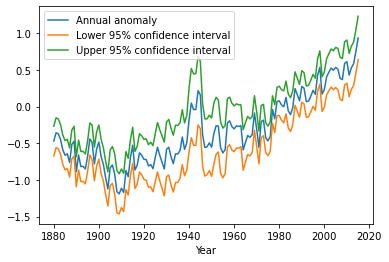

In [7]:
sst.plot()

In [8]:
#Set plotting formats
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [13.0, 6.0]
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 2.0

<AxesSubplot:xlabel='Year'>

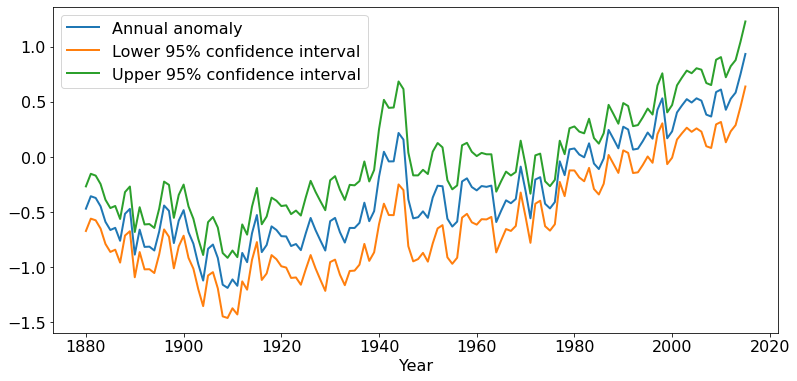

In [9]:
sst.plot()

1850 is usually considered the beginning of the industrial revolution, so before human affected climate by burning fossil fuels (but we did major land use changes and had impacts on many species' extinctions)

There is a definate trend in the data, with a big excursion in the 1940s

Let's ask some research questions. We will start these in lecture and you will finish them in lab:
- What is the trend in this data, that is how fast is SST increasing with time? 
- If we choose a different window for the trend analysis, how does this affect the answer?
- What causes all the interannual variablilty? If we detrend the data how does it look? Can we compare this with climate variabiltiy indices?
- What happened in the 1940s?

see: https://www.newscientist.com/article/dn11639-climate-myths-the-cooling-after-1940-shows-co2-does-not-cause-warming/

I am much more comfortable doing data analysis in xarray so I'm converting the pandas dataframe to an xarray dataset

In [10]:
import xarray as xr

In [11]:
sst_ds = sst.to_xarray()

In [12]:
sst_ds

<xarray.Dataset>
Dimensions:                        (Year: 136)
Coordinates:
  * Year                           (Year) int64 1880 1881 1882 ... 2014 2015
Data variables:
    Annual anomaly                 (Year) float64 -0.47 -0.3569 ... 0.9356
    Lower 95% confidence interval  (Year) float64 -0.6726 -0.5606 ... 0.6401
    Upper 95% confidence interval  (Year) float64 -0.2674 -0.1532 ... 1.231

If we want, we can add a pandas date range to this timeseries and use this for plotting. Not super needed here because it's annual, but would be useful if it was monthly or daily.

In [ ]:
ssha_dates = pd.date_range(start = '1880', end = '2015', freq='Y')

In [ ]:
ssha_dates

In [ ]:
# let's just work with the annual anomaly

sst_ds["Annual anomaly"] # note a lot of the syntax in xarray is similar to pandas

#### Let's do a linear fit of the whole timeseries

In [176]:
from scipy import stats

In [177]:
# the syntax for this function is x,y, so time, ssta
ssta_trend_entire = stats.linregress(sst_ds.Year, sst_ds["Annual anomaly"])

In [34]:
ssta_trend_entire

LinregressResult(slope=0.010013503267496782, intercept=-19.822035179626454, rvalue=0.8362694544139663, pvalue=8.796275453011977e-37, stderr=0.0005671794277975704)

In [35]:
ssta_trend_entire.slope

0.010013503267496782

The value I am interested in is the slope, what is this? What are the units?

Let's plot the line to see the fit. The equation is y = mx + b, where m is the slope and b is the intercept, what are x and y in this case?

In [30]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'SSTA ($\\degree$F)')

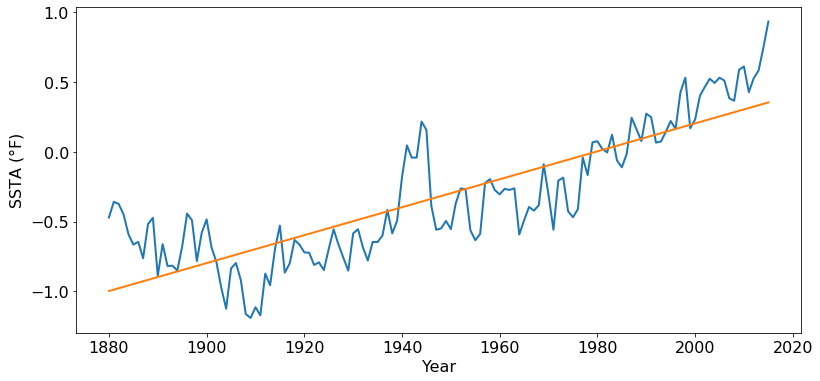

In [36]:
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year, ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept)
plt.xlabel('Year')
plt.ylabel('SSTA ($\degree$F)')

How good of a fit is this for the last few decades?

#### Let's do a linear fit for the last few decades and see what we get.

How do we access the later data?

In [38]:
sst_ds["Annual anomaly"][100:]

<xarray.DataArray 'Annual anomaly' (Year: 36)>
array([ 0.0771966,  0.0219924, -0.0032202,  0.1239354, -0.0596304,
       -0.109917 , -0.0137916,  0.2456388,  0.1634436,  0.0785898,
        0.274842 ,  0.2497932,  0.0669942,  0.0748224,  0.1436454,
        0.2219328,  0.1661922,  0.428193 ,  0.5327244,  0.1698606,
        0.2325024,  0.4042188,  0.4671414,  0.5250798,  0.4946364,
        0.5327874,  0.5114556,  0.3846042,  0.3673116,  0.5894424,
        0.6127182,  0.4286736,  0.528696 ,  0.5846742,  0.7512552,
        0.935577 ])
Coordinates:
  * Year     (Year) int64 1980 1981 1982 1983 1984 ... 2011 2012 2013 2014 2015

In [193]:
# the syntax for this function is x,y, so time, ssta
ssta_trend_1980_on = stats.linregress(sst_ds.Year[100:], sst_ds["Annual anomaly"][100:])

Text(0, 0.5, 'SSTA ($\\degree$F)')

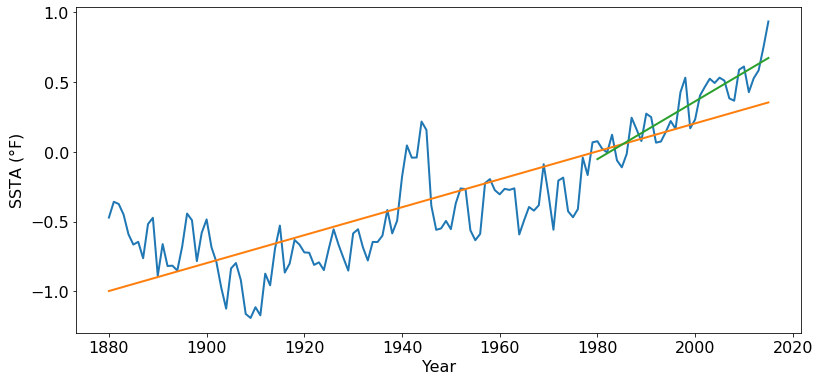

In [41]:

plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year, ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept)
plt.plot(sst_ds.Year[100:], ssta_trend_1980_on.slope*sst_ds.Year[100:] + ssta_trend_1980_on.intercept)
plt.xlabel('Year')
plt.ylabel('SSTA ($\degree$F)')

In [195]:
ssta_trend_1980_on.rvalue

0.8829830021529422

#### Detrending the data
Let's say we were interested in the variability outside of the trend. How do we detrend the data?

In [42]:
trend_entire = ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept

In [43]:
sst_detrended = sst_ds["Annual anomaly"] - trend_entire

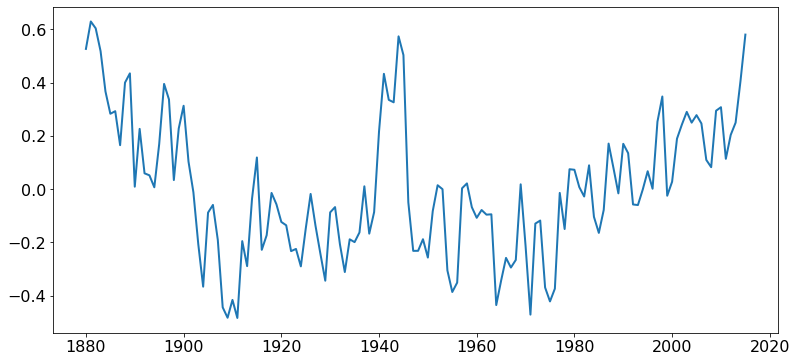

In [44]:
plt.plot(sst_ds.Year, sst_detrended)

#### Creating a moving average, i.e. filtering or smoothing.
Let's say we wanted to smooth the data to remove some of the variability, how would we do this?

In [45]:
import numpy as np

In [46]:
# initialize my array
ssta_filtered = np.zeros(136)

for i in range(134): # loop through all the years, skip the last index
    #print(i+1) #skip the first index
    ssta_filtered[i+1] = (sst_ds["Annual anomaly"][i] + sst_ds["Annual anomaly"][i+1] + sst_ds["Annual anomaly"][i+2])/3

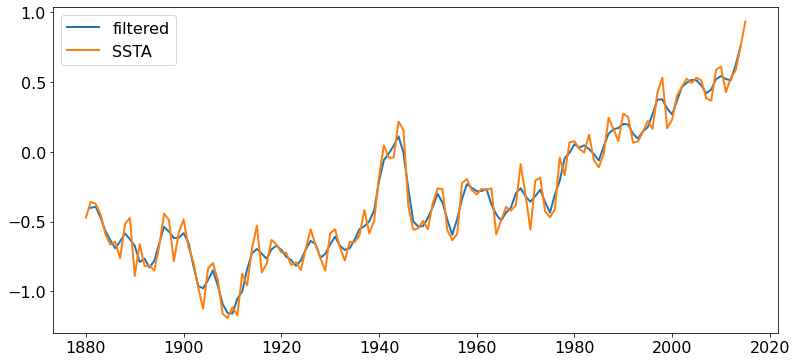

In [47]:
plt.plot(sst_ds.Year[1:-1],ssta_filtered[1:-1], label = "filtered")
plt.plot(sst_ds.Year,sst_ds["Annual anomaly"], label = 'SSTA')
plt.legend()

# Lab 12.2

**E.1** Define a datetime object that is your birthday. Increment this date using timedelta by a) ten weeks, b) five minutes, c) two years (tricky!) Hint: see help(timedelta)

In [50]:
birthday=datetime(1988,6,28)

In [54]:
birthday=birthday+timedelta(weeks=10)

In [55]:
birthday=birthday+timedelta(minutes=5)

In [63]:
birthday

datetime.datetime(1988, 9, 6, 0, 5)

In [60]:
timedelta?

Init signature: timedelta(self, /, *args, **kwargs)
Docstring:     
Difference between two datetime values.

timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)

All arguments are optional and default to 0.
Arguments may be integers or floats, and may be positive or negative.
File:           c:\users\adamf\anaconda3\lib\datetime.py
Type:           type
Subclasses:     _Timedelta


In [67]:
birthday=birthday+timedelta(days=730)
birthday

datetime.datetime(1991, 9, 6, 0, 5)

**E.2** Define a daterange for your birthday every year of your life

In [93]:
e2=pd.date_range(start='6/28/1988',end='4/11/2021', freq=pd.DateOffset(years=1))

DatetimeIndex(['1988-06-28', '1989-06-28', '1990-06-28', '1991-06-28',
               '1992-06-28', '1993-06-28', '1994-06-28', '1995-06-28',
               '1996-06-28', '1997-06-28', '1998-06-28', '1999-06-28',
               '2000-06-28', '2001-06-28', '2002-06-28', '2003-06-28',
               '2004-06-28', '2005-06-28', '2006-06-28', '2007-06-28',
               '2008-06-28', '2009-06-28', '2010-06-28', '2011-06-28',
               '2012-06-28', '2013-06-28', '2014-06-28', '2015-06-28',
               '2016-06-28', '2017-06-28', '2018-06-28', '2019-06-28',
               '2020-06-28'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

In [98]:
e2[1]

Timestamp('1989-06-28 00:00:00', freq='<DateOffset: years=1>')

## 

**E.3** Print all your birthdays out as month, day, year (no minutes, etc)

In [101]:
i=0
for a in e2:
    print(e2[i].strftime("%m/%d/%Y"))
    i=i+1

06/28/1988
06/28/1989
06/28/1990
06/28/1991
06/28/1992
06/28/1993
06/28/1994
06/28/1995
06/28/1996
06/28/1997
06/28/1998
06/28/1999
06/28/2000
06/28/2001
06/28/2002
06/28/2003
06/28/2004
06/28/2005
06/28/2006
06/28/2007
06/28/2008
06/28/2009
06/28/2010
06/28/2011
06/28/2012
06/28/2013
06/28/2014
06/28/2015
06/28/2016
06/28/2017
06/28/2018
06/28/2019
06/28/2020


**E.4** Go through the tutorial on datetimes in pandas here: https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587 Type in all the examples here in the lab.

In [102]:
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],'value': [2, 3, 4]})
df['date'] = pd.to_datetime(df['date'])
df

,date,value
0,2000-03-10,2
1,2000-03-11,3
2,2000-03-12,4


In [104]:
df1 = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],'value': [2, 3, 4]})
df1['date'] = pd.to_datetime(df1['date'], dayfirst=True)
df1

,date,value
0,2000-10-03,2
1,2000-11-03,3
2,2000-12-03,4


In [105]:
df2 = pd.DataFrame({'date': ['2016-6-10 20:30:0', '2016-7-1 19:45:30', '2013-10-12 4:5:1'], 'value': [2, 3, 4]})
df2['date'] = pd.to_datetime(df['date'], format="%Y-%d-%m %H:%M:%S")
df2

,date,value
0,2000-10-03,2
1,2000-11-03,3
2,2000-12-03,4


In [107]:
df3 = pd.DataFrame({'date': ['3/11/2000', '3/12/2000', '3/13/2000'] * 1000 })

In [110]:
%timeit pd.to_datetime(df3['date'], infer_datetime_format=True)

2.98 ms ± 975 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [111]:
%timeit pd.to_datetime(df3['date'], infer_datetime_format=False)

2.41 ms ± 492 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [114]:
df4 = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'], 'value': [2, 3, 4]})
df4['date'] = pd.to_datetime(df4['date'], errors='ignore')
df

,date,value
0,3/10/2000,2
1,a/11/2000,3
2,3/12/2000,4


In [115]:
df4['date'] = pd.to_datetime(df4['date'], errors='coerce')
df4

,date,value
0,2000-03-10,2
1,NaT,3
2,2000-03-12,4


In [116]:
df5 = pd.DataFrame({'year': [2015, 2016],'month': [2, 3],'day': [4, 5]})
df5['date'] = pd.to_datetime(df5)
df5

,year,month,day,date
0,2015,2,4,2015-02-04
1,2016,3,5,2016-03-05


In [118]:
df6 = pd.DataFrame({'name': ['Tom', 'Andy', 'Lucas'], 'DoB': ['08-05-1997', '04-28-1996', '12-16-1995']})
df6['DoB'] = pd.to_datetime(df6['DoB'])
df6

,name,DoB
0,Tom,1997-08-05
1,Andy,1996-04-28
2,Lucas,1995-12-16


In [119]:
df6['year']= df6['DoB'].dt.year
df6['month']= df6['DoB'].dt.month
df6['day']= df6['DoB'].dt.day
df6

,name,DoB,year,month,day
0,Tom,1997-08-05,1997,8,5
1,Andy,1996-04-28,1996,4,28
2,Lucas,1995-12-16,1995,12,16


In [120]:
df6['week_of_year'] = df6['DoB'].dt.week
df6['day_of_week'] = df6['DoB'].dt.dayofweek
df6['is_leap_year'] = df6['DoB'].dt.is_leap_year
df6

<ipython-input-120-be0dc5ec04c2>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df6['week_of_year'] = df6['DoB'].dt.week


,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year
0,Tom,1997-08-05,1997,8,5,32,1,False
1,Andy,1996-04-28,1996,4,28,17,6,True
2,Lucas,1995-12-16,1995,12,16,50,5,False


In [121]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
df6['day_of_week_name']=df6['DoB'].dt.weekday.map(dw_mapping)
df6

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday
1,Andy,1996-04-28,1996,4,28,17,6,True,Sunday
2,Lucas,1995-12-16,1995,12,16,50,5,False,Saturday


In [122]:
today = pd.to_datetime('today')
df6['age'] = today.year - df6['DoB'].dt.year
df6

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name,age
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday,24
1,Andy,1996-04-28,1996,4,28,17,6,True,Sunday,25
2,Lucas,1995-12-16,1995,12,16,50,5,False,Saturday,26


In [123]:
diff_y = today.year - df6['DoB'].dt.year
b_md = df6['DoB'].apply(lambda x: (x.month,x.day) )
no_birthday = b_md > (today.month,today.day)
df6['age'] = diff_y - no_birthday
df6

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name,age
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday,23
1,Andy,1996-04-28,1996,4,28,17,6,True,Sunday,24
2,Lucas,1995-12-16,1995,12,16,50,5,False,Saturday,25


In [152]:
df7=pd.read_csv('city_sales.txt')
df7

,date,num,city
0,2015-01-01 09:00:00,4,London
1,2015-01-01 09:01:00,4,London
2,2015-01-01 09:02:00,3,London
3,2015-01-01 09:03:00,3,London
4,2015-01-01 09:04:00,3,London
...,...,...,...
1795139,2019-01-31 15:56:00,3,Cambridge
1795140,2019-01-31 15:57:00,3,Cambridge
1795141,2019-01-31 15:58:00,3,Cambridge
1795142,2019-01-31 15:59:00,3,Cambridge


In [153]:
df7['date'] = pd.to_datetime(df7['date'])

In [154]:
df7 = df7.set_index(['date'])

In [156]:
df7.loc['2018']

,num,city
date,,
2018-01-01 09:00:00,2,London
2018-01-01 09:01:00,1,London
2018-01-01 09:02:00,3,London
2018-01-01 09:03:00,3,London
2018-01-01 09:04:00,3,London
...,...,...
2018-12-31 15:56:00,4,Cambridge
2018-12-31 15:57:00,2,Cambridge
2018-12-31 15:58:00,3,Cambridge


In [158]:
df7.loc['2018','num'].sum()

1231190

In [162]:
df7.loc['2018'].groupby('city').sum()

,num
city,
Cambridge,308428
Durham,307965
London,307431
Oxford,307366


In [164]:
df7.loc['2018-5']

,num,city
date,,
2018-05-01 09:00:00,1,London
2018-05-01 09:01:00,4,London
2018-05-01 09:02:00,3,London
2018-05-01 09:03:00,2,London
2018-05-01 09:04:00,3,London
...,...,...
2018-05-31 15:56:00,3,Cambridge
2018-05-31 15:57:00,4,Cambridge
2018-05-31 15:58:00,2,Cambridge


In [166]:
df7.loc['2018-5-1']

,num,city
date,,
2018-05-01 09:00:00,1,London
2018-05-01 09:01:00,4,London
2018-05-01 09:02:00,3,London
2018-05-01 09:03:00,2,London
2018-05-01 09:04:00,3,London
...,...,...
2018-05-01 15:56:00,2,Cambridge
2018-05-01 15:57:00,3,Cambridge
2018-05-01 15:58:00,3,Cambridge


In [167]:
df7.loc['2016' : '2018']

,num,city
date,,
2016-01-01 09:00:00,4,London
2016-01-01 09:01:00,3,London
2016-01-01 09:02:00,4,London
2016-01-01 09:03:00,4,London
2016-01-01 09:04:00,2,London
...,...,...
2018-12-31 15:56:00,4,Cambridge
2018-12-31 15:57:00,2,Cambridge
2018-12-31 15:58:00,3,Cambridge


In [168]:
df7.loc['2018-5-2 10' : '2018-5-2 11' ]

,num,city
date,,
2018-05-02 10:00:00,2,London
2018-05-02 10:01:00,3,London
2018-05-02 10:02:00,4,London
2018-05-02 10:03:00,4,London
2018-05-02 10:04:00,4,London
...,...,...
2018-05-02 11:55:00,3,Cambridge
2018-05-02 11:56:00,3,Cambridge
2018-05-02 11:57:00,4,Cambridge


In [170]:
df7.loc['2018-5-2 10:30' : '2018-5-2 10:45']

,num,city
date,,
2018-05-02 10:30:00,3,London
2018-05-02 10:31:00,3,London
2018-05-02 10:32:00,1,London
2018-05-02 10:33:00,3,London
2018-05-02 10:34:00,3,London
...,...,...
2018-05-02 10:41:00,3,Cambridge
2018-05-02 10:42:00,3,Cambridge
2018-05-02 10:43:00,3,Cambridge


In [171]:
df7.between_time('10:30','10:45')

,num,city
date,,
2015-01-01 10:30:00,4,London
2015-01-01 10:31:00,3,London
2015-01-01 10:32:00,3,London
2015-01-01 10:33:00,3,London
2015-01-01 10:34:00,4,London
...,...,...
2019-01-31 10:41:00,3,Cambridge
2019-01-31 10:42:00,3,Cambridge
2019-01-31 10:43:00,1,Cambridge


In [174]:
df7['rolling_sum'] = df7.rolling(3).sum()
df7.head()

,num,city,rolling_sum
date,,,
2015-01-01 09:00:00,4,London,NaN
2015-01-01 09:01:00,4,London,NaN
2015-01-01 09:02:00,3,London,11.0
2015-01-01 09:03:00,3,London,10.0
2015-01-01 09:04:00,3,London,9.0


In [175]:
df7['rolling_sum_backfilled'] = df7['rolling_sum'].fillna(method='backfill')
df7.head()

,num,city,rolling_sum,rolling_sum_backfilled
date,,,,
2015-01-01 09:00:00,4,London,NaN,11.0
2015-01-01 09:01:00,4,London,NaN,11.0
2015-01-01 09:02:00,3,London,11.0,11.0
2015-01-01 09:03:00,3,London,10.0,10.0
2015-01-01 09:04:00,3,London,9.0,9.0


**E.5** Do a linear fit of the SSTA data from 1940 to 1970. What trend do you get? How confident are you in this result? How does it compare to the trends we did in lecture (use quantitative data to explain).

In [179]:
ssta_trend_1940_1970 = stats.linregress(sst_ds.Year[60:91], sst_ds["Annual anomaly"][60:91])

Text(0, 0.5, 'SSTA ($\\degree$F)')

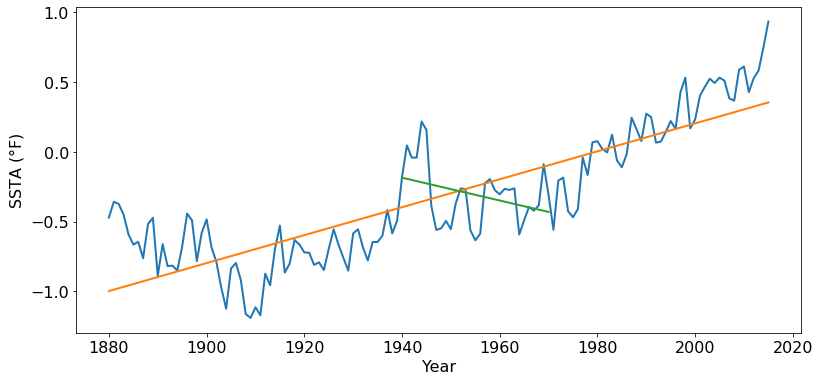

In [189]:
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year, ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept)
plt.plot(sst_ds.Year[60:91], ssta_trend_1940_1970.slope*sst_ds.Year[60:91] + ssta_trend_1940_1970.intercept)
plt.xlabel('Year')
plt.ylabel('SSTA ($\degree$F)')

In [181]:
ssta_trend_1940_1970.slope

-0.008184913548387096

In [188]:
ssta_trend_1940_1970.rvalue

-0.33625811590031707

In [190]:
ssta_trend_entire.slope

0.010013503267496782

In [191]:
ssta_trend_entire.rvalue

0.8362694544139663

In [ ]:
#The trend is negative with a weaker correlation than the trend for the other date ranges.
#Due to the lower r value I would be less confident of this trend than I would be of the other trend lines. 
#The slope for 1940-1970 is -.oo8 degrees F/year, making it the lowest slope and the only negative one that we examined.

**E.6** According to the internet, what might have caused this decline in SST during this perioud? Write a few sentances explaining this and cite your sources here.

Anthropogenic sulphate aerosols are likely the cause of most of the cooling. These aerosols caused cooling by reflecting radiation out of the atmosphere and preventing warming. The reduction of sulphate aerosols and increase in greenhouse gasses has minimized the cooling observed after the 70's. 

Tett, Simon FB, et al. "Causes of twentieth-century temperature change near the Earth's surface." Nature 399.6736 (1999): 569-572.

**E.7** Detrend from 1970 on and plot your result. Compare this to an ENSO (El Nino) index and speculate on what may have caused this interannual variability. How does ENSO affect SST and why?

In [206]:
ssta_trend_1970_on = stats.linregress(sst_ds.Year[90:], sst_ds["Annual anomaly"][90:])
trend_1970_on = ssta_trend_1970_on.slope*sst_ds.Year + ssta_trend_1970_on.intercept

In [207]:
sst_detrended_1970_on = sst_ds["Annual anomaly"][90:] - trend_1970_on

([<matplotlib.axis.XTick at 0x1fc8767a370>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

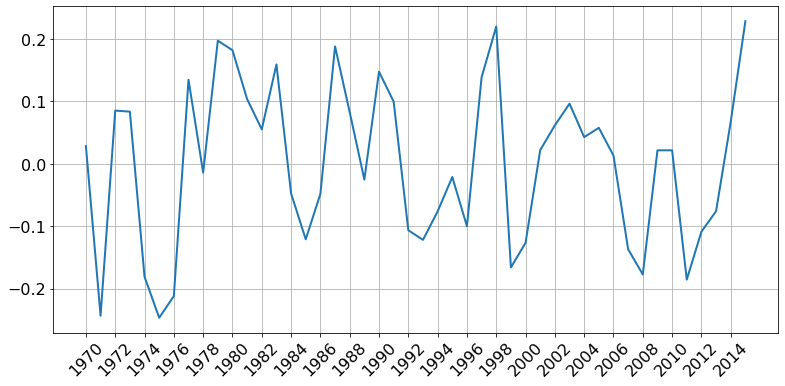

In [218]:
plt.plot(sst_ds.Year[90:], sst_detrended_1970_on)
plt.grid()
plt.xticks(np.arange(1970,2015,2),rotation=45)

The ENSO cycle seems to align closely with the interannual variability shown on the detrended plot, and it is likely that much of the interannual variability in SST is caused by the ENSO cycle. Warm periods(El Nino) coincide with higher SST and cool periods (La Nina) coincide with lower SST.

**E.8** (Advanced) Perform a five year moving average of your detrended data from E.7. Explain your result in relation to the periodicity of ENSO.

In [225]:
ssta_filtered_1970_on = np.zeros(46)

for i in range(41): 
    ssta_filtered_1970_on[i] = (sst_detrended_1970_on[i] + sst_detrended_1970_on[i+1] + sst_detrended_1970_on[i+2] + sst_detrended_1970_on[i-2] + sst_detrended_1970_on[i-1])/5

([<matplotlib.axis.XTick at 0x1fc8c199b80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

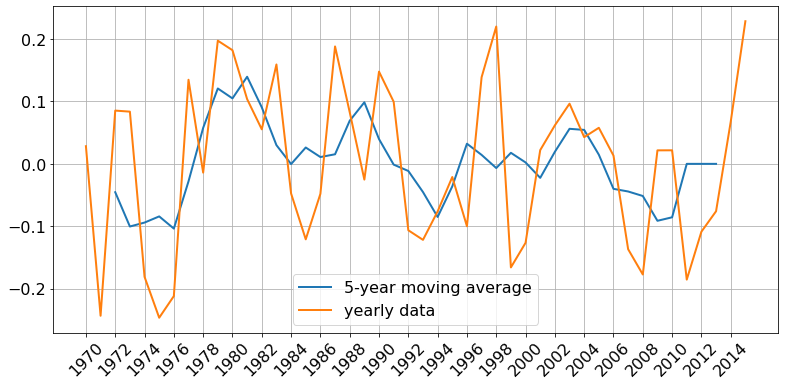

In [229]:
plt.plot(sst_ds.Year[92:-2], ssta_filtered_1970_on[2:-2], label = "5-year moving average")
plt.plot(sst_ds.Year[90:], sst_detrended_1970_on, label ="yearly data")
plt.legend()
plt.grid()
plt.xticks(np.arange(1970,2015,2),rotation=45)

The 5-year moving average shows the average a full ENSO cycle for each year since a full cool and warm period takes about 5 years. The 5-year average smooths out yearly extremes and accounts for the cycles more fully and shows what the combined energy of the cool and warm periods are. This is shown by the strong el Nino from 1998 being smoothed in the 5-year average because it was not sustained and was preceded and followed by relatively cooler parts of the ENSO cycle.